# É possível dobrar o seu dinheiro na bolsa de valores em 3 anos? | O método Monte Carlo

- Criada durante a segunda guerra mundial.
- Nomeado em homenagem a cidade de mônaco com seus cassinos.
- Foi criada originalmente para testar cenários do jogo de paciência.
- Usada para estimar os possíveis resultados de um evento incerto. O acaso é principal elemento da abordagem na modelagem.

----

## Questão a ser respondida:

Em quanto tempo você demoraria pra dobrar seu investimento investindo no ibovespa, o principal índice de ações do Brasil?
Esse investimento vai permitir que você dobre o seu dinheiro com qual probabilidade?

- Tempo máximo, tempo mínimo.
- Janela móvel de probabilidade x tempo decorrido em ações.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
from numpy import linalg as LA
import pandas as pd
import mplcyberpunk

plt.style.use("cyberpunk")

In [12]:
#pegando dados

data_final = dt.datetime.now()
data_inicial = data_final - dt.timedelta(days=10000)

precos = yf.download('^BVSP', data_inicial, data_final)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [13]:
retornos = precos.pct_change()

In [14]:
simulacoes = 10000
dias_projetados = 756

valores_carteira = np.zeros([dias_projetados, simulacoes])

for i in range(simulacoes):

    valor_simulado = np.random.choice(retornos, size = dias_projetados, replace = True)
    valor_final = 1000*(1 + valor_simulado).cumprod()
    
    
    valores_carteira[:, i] = valor_final

# Simulações

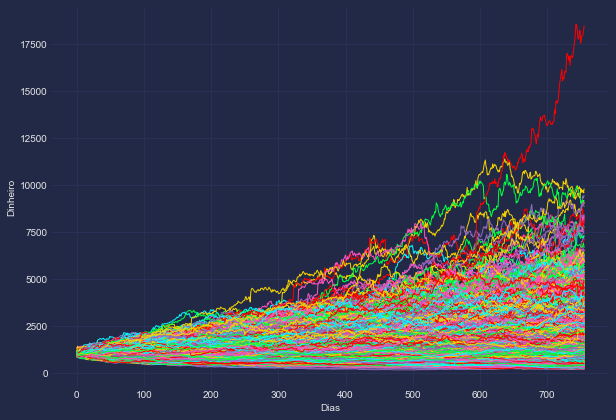

In [22]:
plt.figure(figsize = ((10, 7)))
plt.plot(valores_carteira, linewidth=1)
plt.ylabel('Dinheiro')
plt.xlabel('Dias')
plt.show()

In [23]:
dobrou_o_dinheiro = valores_carteira > 2000
dobrou_o_dinheiro = pd.DataFrame(dobrou_o_dinheiro)
amostra_que_dobrou = dobrou_o_dinheiro.sum(axis = 1)/simulacoes
amostra_que_nao_dobrou = 1 - amostra_que_dobrou

# % da amostra que dobrou ao longo dos 3 anos.

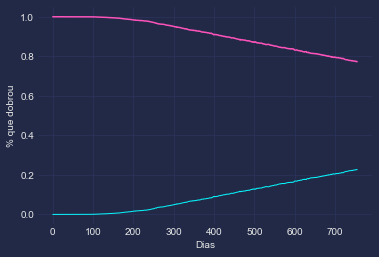

In [24]:
plt.figure(figsize = ((10, 7)))
plt.plot(amostra_que_dobrou, linewidth=1)
plt.plot(amostra_que_nao_dobrou)
plt.ylabel('% que dobrou')
plt.xlabel('Dias')
plt.show()

In [25]:
valores_carteira = pd.DataFrame(valores_carteira)

menor_tempo = valores_carteira[valores_carteira.max(axis = 1) > 2000]
menor_tempo

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
66,1037.230104,868.470153,1068.355365,1323.474827,1005.770087,1335.311844,1123.541645,1143.195832,918.403078,944.516777,...,1075.465590,795.661940,1079.429370,845.970831,1076.502853,966.600508,1265.062997,1089.735017,1739.501387,1217.280881
67,1043.293956,858.927889,1114.531172,1323.474827,1008.395247,1361.455425,1127.001111,1131.297827,922.981167,940.771160,...,1083.073489,787.152126,1061.075367,832.200605,1113.318211,960.416898,1274.911421,1068.812445,1713.827388,1220.713781
68,1042.595072,882.456743,1097.590745,1330.738876,1013.246854,1368.695947,1141.568435,1118.623261,909.345616,941.222336,...,1085.338268,797.169816,1079.276863,842.867831,1109.790023,952.583184,1282.370539,1079.794523,1719.188989,1235.506782
69,1039.974529,898.207478,1060.545276,1290.820629,1008.810819,1350.680955,1119.480499,1125.991796,905.580415,986.805258,...,1128.821498,784.657592,1091.322761,847.499156,1106.682992,949.249922,1267.590975,1084.000575,1731.760180,1229.485131
70,1064.306309,899.182166,1062.873616,1267.897709,1029.937108,1348.044574,1106.600871,1125.484074,905.501759,982.330165,...,1122.846360,772.632875,1098.896424,854.934438,1092.154012,926.916779,1231.228386,1090.025896,1740.737344,1247.280406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,NaN,1435.330577,519.489668,1479.031072,2474.654605,977.404165,1136.488922,1557.495019,1113.958399,3231.761910,...,3174.645498,1161.243392,NaN,1170.823024,2062.557729,1340.627349,1257.893561,1788.891456,2268.175391,990.339425
752,NaN,1447.090126,522.179376,1491.004838,2490.966143,995.277869,1123.605113,1511.786908,1118.116841,3103.186108,...,3151.763039,1167.432474,NaN,1172.817134,2085.334658,1316.555311,1254.791994,1758.448182,2250.203347,1001.350279
753,NaN,1393.103356,528.658411,1549.876008,2516.560891,980.025441,1118.952758,1504.037135,1105.939901,3003.917844,...,3160.047191,1169.544741,NaN,1159.494774,2118.398989,1279.670038,1250.819581,1738.751329,2264.351809,1024.240430
754,NaN,1365.944195,533.025078,1545.484622,2537.407454,1016.486558,1103.798091,1508.127875,1127.965248,2953.856296,...,3196.412994,1211.120843,NaN,1142.480142,2088.653460,1293.103777,1257.957834,1758.801098,2333.795840,1049.725883
